In [118]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.style as psy
#%matplotlib inline

# Set seaborn scheme
import seaborn as sns
sns.set(style="whitegrid")

# Displaying figure
import plotly.graph_objects as go

# Generating offline graphs within notebook
import plotly.offline as plf
plf.init_notebook_mode(connected=True)

import missingno as msno

from sklearn import preprocessing


### 1. Dataset Preparation

In [119]:
test_df = pd.read_csv("test.csv")

train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,5,1.0,29.0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,5,1.0,29.0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,2,1.0,12.0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,2,1.0,30.0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,5,1.0,29.0


#### Data Fields

Attributes<br>
There are 12 features / attributes as following:<br>
<strong>Elevation</strong> - Elevation in meters, <strong>numerical</strong><br>
<strong>Aspect</strong> - Aspect in degrees azimuth, <strong>numerical</strong> <br>
<strong>Slope</strong> - Slope in degrees, <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Hydrology</strong> - Horz Dist to nearest surface water features, <strong>numerical</strong> <br>
<strong>Vertical_Distance_To_Hydrology</strong> - Vert Dist to nearest surface water features,  <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Roadways</strong> - Horz Dist to nearest roadway, <strong>numerical</strong><br>
<strong>Hillshade_9am</strong>  (0 to 255 index) - Hillshade index at 9am, summer solstice, <strong>numerical</strong> <br>
<strong>Hillshade_Noon</strong>  (0 to 255 index) - Hillshade index at noon, summer solstice,  <strong>numerical</strong> <br>
<strong>Hillshade_3pm</strong>  (0 to 255 index)- Hillshade index at 3pm, summer solstice, <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Fire_Points</strong> - Horz Dist to nearest wildfire ignition points, <strong>numerical</strong> <br>
<strong>Wilderness_Area</strong> (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation, <strong>categorical</strong> <br>
<strong>Soil_Type</strong> (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation, <strong>categorical</strong><br>

Class<br>
<strong>Cover_Type</strong> (7 types, integers 1 to 7) - Forest Cover Type designation, <strong>categorical</strong><br>

In [120]:
numerical_features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

OHE_features = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

categorical_features = ['Wilderness_Area', 'Soil_Type']

cover_type = {1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4 : 'Cottonwood/Willow',5 : 'Aspen',6:'Douglas-fir',7:'Krummholz'}

wilderness_areas ={1:'Rawah',2:'Neota',3:'Comanche Peak',4:'Cache la Poudre'}

soil_types = {1: 'Cathedral',2: 'Vanet - Ratake',3: 'Haploborolis',4: 'Ratake',5: 'Vanet',6: 'Vanet - Wetmore',7: 'Gothic',8: 'Supervisor - Limber',9: 'Troutville family',10: 'Rock outcrop',
11: 'Rock land',12: 'Legault',13: 'Catamount',14: 'Pachic Argiborolis',15: 'unspecified',16: 'Cryaquolis - Cryoborolis',17: 'Gateview',18: 'Rogert',19: 'Typic Cryaquolis',20: 'Typic Cryaquepts',
21: 'Typic Cryaquolls',22: 'Leighcan extremely bouldery',23: 'Leighcan - Typic Cryaquolls',24: 'Leighcan extremely stony',25: 'Leighcan warm, extremely stony',26: 'Granile - Catamount',27: 'Leighcan, warm',
28: 'Leighcan',29: 'Como - Legault',30: 'Como',31: 'Leighcan - Catamount',32: 'Catamount',33: 'Leighcan - Catamount - Rock outcrop',34: 'Cryorthents',35: 'Cryumbrepts',36: 'Bross',37: 'Rock - Cryumbrepts - Cryorthents',
38: 'Leighcan - Moran',39: 'Moran Leighcan',40: 'Moran Rock',41: 'NaN'}

In [121]:
# Create categorical features for Wilderness_Area
for i in range(1,5):
    train_df.loc[train_df['Wilderness_Area' + str(i)] == 1, 'Wilderness_Area'] = i
    
    
# Create categorical features for Soil_Type
for i in range(1,40):
    train_df.loc[train_df['Soil_Type' + str(i)] == 1, 'Soil_Type'] = i
    


### 2. Data Preprocessing
● Data screening/cleaning 

    ○ Data validation (valid range, internal consistency).
    ○ Missing values.
    ○ etc.
● Normalization

● Split data into training, validation and testing

● Feature selection 
####  2.1 Missing value

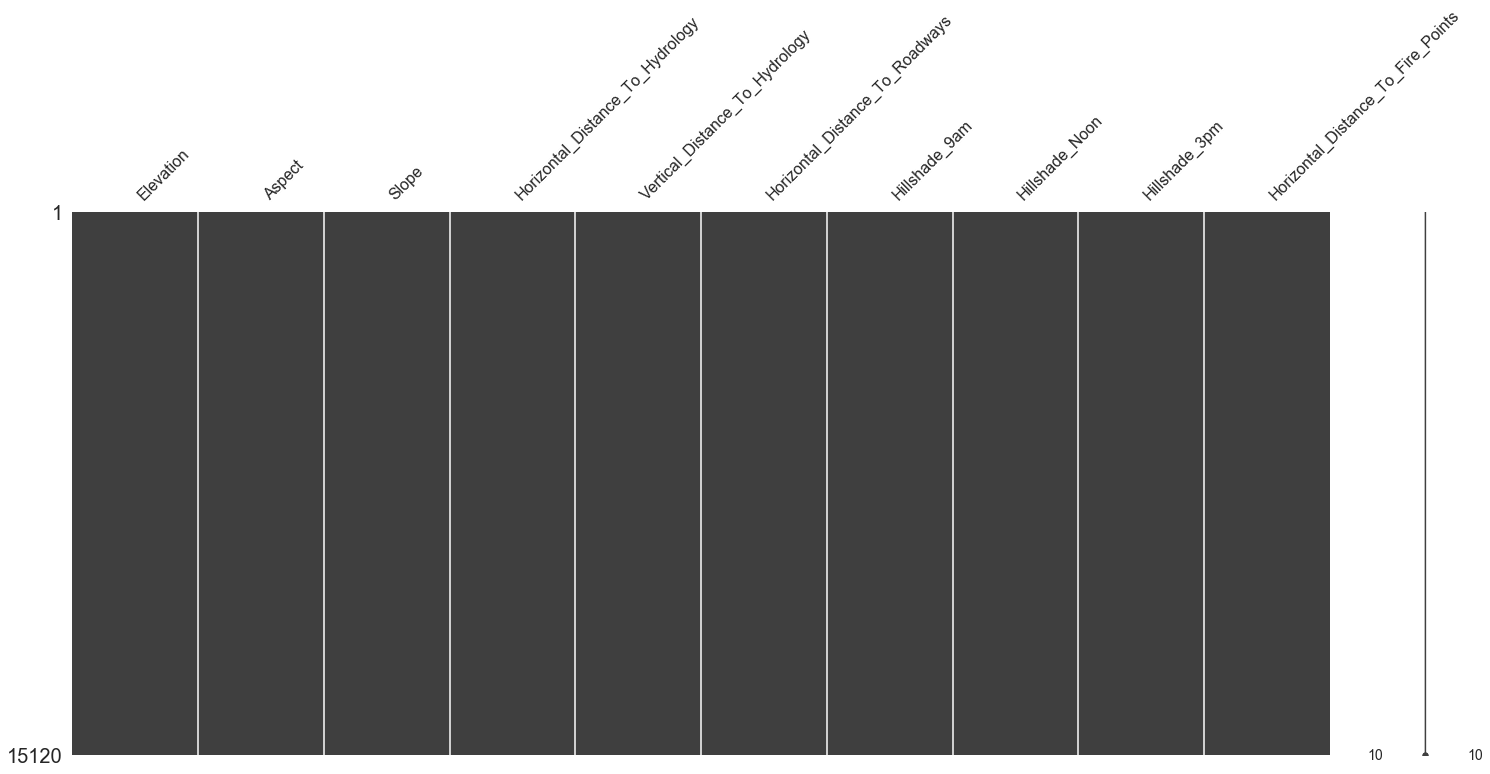

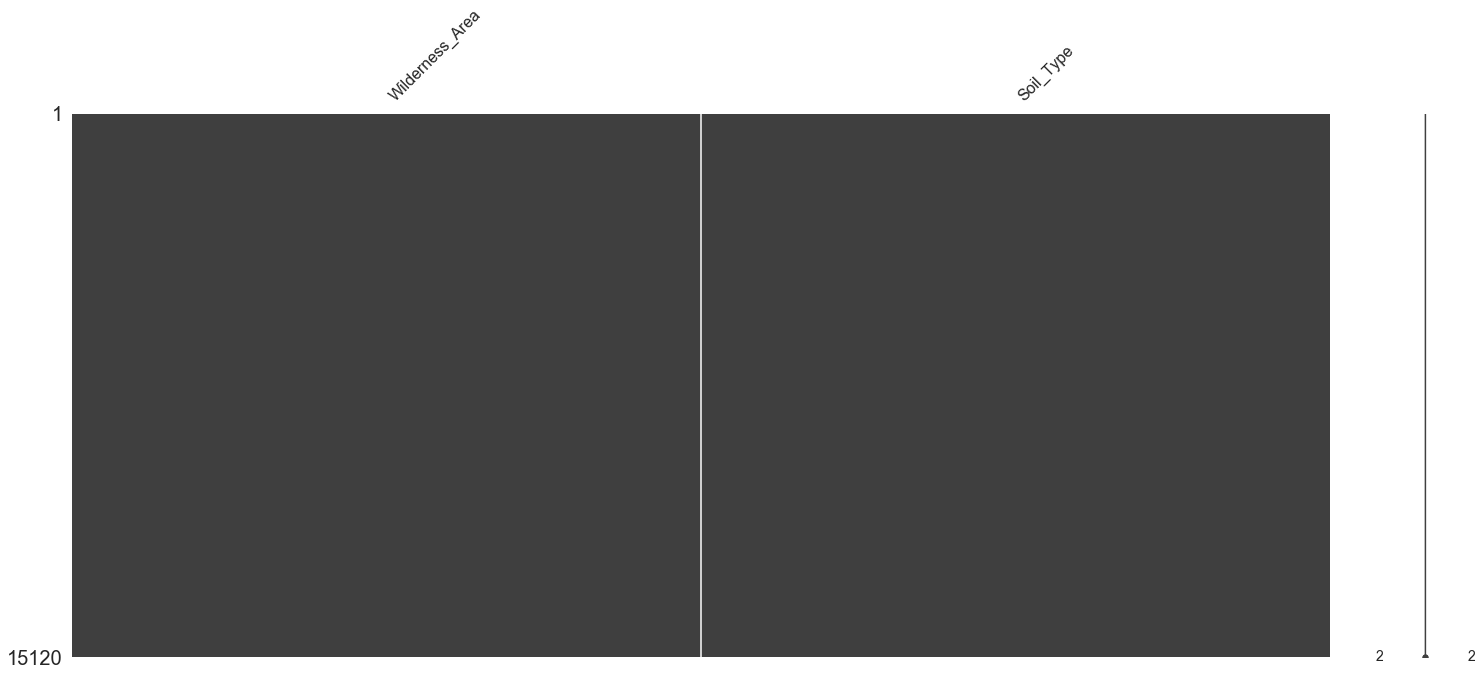

In [122]:
# check missing value
msno.matrix(train_df[numerical_features])
msno.matrix(train_df[categorical_features])

#train_df.loc[train_df['Soil_Type'].isnull()]

In [123]:
# Fill 'Soil_Type' missing value with 41 
train_df.Soil_Type.fillna(41, inplace=True)


#train_df.loc[train_df['Soil_Type'].isnull()]

In [124]:
#Saving Ids
train_ID = train_df['Id']


#Dropping Ids
#train_df.drop("Id", axis = 1, inplace = True)
#test_df.drop("Id", axis = 1, inplace = True)

train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,5,1.0,29.0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,5,1.0,29.0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,2,1.0,12.0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,2,1.0,30.0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,5,1.0,29.0


### 2.2 Outlier

In [125]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.00000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000,2.800397,19.20172
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066,1.119832,12.67810
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,10.00000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,17.00000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,30.00000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,41.00000


In [126]:
CoverType = []
CoverType = train_df['Cover_Type']
CoverType.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [127]:
# the original features after transformed Wilderness_Area & Soil_Type
data_A = pd.DataFrame(train_df, columns = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area', 'Soil_Type','Cover_Type'])
data_A.head()
data_A.shape
data_A.to_csv('data_A.csv',index = None)

RFC: 0.857058 (0.006230)
XTC: 0.867145 (0.006393)


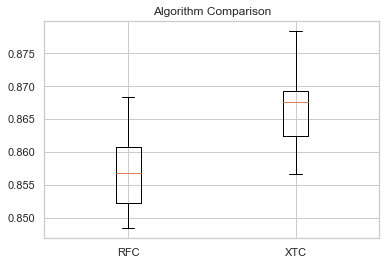

In [128]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset

# names = ['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
#                           ' sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade','aspect_Direction','Cover_Type']


names = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area', 'Soil_Type','Cover_Type']

# Split-out validation dataset
array = data_A.values
X = array[:,0:12]
y = array[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Y_train = Y_train.astype('float')
Y_validator = Y_validation.astype('float')
# Spot Check Algorithms
models = []


# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC', RandomForestClassifier(n_estimators=200, max_features=3)))
# models.append(('ABC', AdaBoostClassifier(n_estimators=100, random_state=1)))
models.append(('XTC', ExtraTreesClassifier(n_estimators=200, max_features=3)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

0.7966269841269841
[[270  84   2   0  14   0  64]
 [100 244  23   1  62  21   7]
 [  0   6 329  31   8  63   0]
 [  0   0  18 423   0   6   0]
 [  1   7  10   0 398   2   0]
 [  0   2  40  17   7 345   0]
 [ 15   4   0   0   0   0 400]]
              precision    recall  f1-score   support

         1.0       0.70      0.62      0.66       434
         2.0       0.70      0.53      0.61       458
         3.0       0.78      0.75      0.77       437
         4.0       0.90      0.95      0.92       447
         5.0       0.81      0.95      0.88       418
         6.0       0.79      0.84      0.81       411
         7.0       0.85      0.95      0.90       419

    accuracy                           0.80      3024
   macro avg       0.79      0.80      0.79      3024
weighted avg       0.79      0.80      0.79      3024



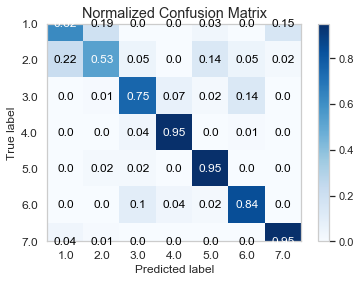

In [129]:
import scikitplot as skplt

rndf = RandomForestClassifier(n_estimators=100, max_features=5)
rndf.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
skplt.metrics.plot_confusion_matrix(
    Y_validation, 
    predictions, normalize=True)

print(classification_report(Y_validation, predictions))